In [1]:
# Author : Vignesh Gopinathan(code developed with reference from various internet sources)
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

In [2]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# New model Creation.
model = Sequential()
for layer in vgg16_model.layers[:-2]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=2, activation='softmax'))

In [4]:
#Data Generation.
train_path = '/media/vignesh/GAME ON/CSIS/05_MachineLearning/KERAS/maskdata/train'
valid_path = '/media/vignesh/GAME ON/CSIS/05_MachineLearning/KERAS/maskdata/valid'
test_path = '/media/vignesh/GAME ON/CSIS/05_MachineLearning/KERAS/maskdata/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['with_mask', 'without_mask'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['with_mask', 'without_mask'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['with_mask', 'without_mask'], batch_size=10, shuffle=False)

Found 616 images belonging to 2 classes.
Found 484 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [5]:
# Model Compilation.
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Model Training.
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
62/62 - 268s - loss: 0.9849 - accuracy: 0.7955 - val_loss: 0.2475 - val_accuracy: 0.9298
Epoch 2/5
62/62 - 274s - loss: 0.1743 - accuracy: 0.9481 - val_loss: 0.0975 - val_accuracy: 0.9711
Epoch 3/5
62/62 - 277s - loss: 0.0795 - accuracy: 0.9756 - val_loss: 0.0448 - val_accuracy: 0.9855
Epoch 4/5
62/62 - 272s - loss: 0.0391 - accuracy: 0.9838 - val_loss: 0.0148 - val_accuracy: 0.9959
Epoch 5/5
62/62 - 272s - loss: 0.0181 - accuracy: 0.9951 - val_loss: 0.0087 - val_accuracy: 0.9979


Confusion matrix, without normalization
[[ 66   0]
 [  7 125]]


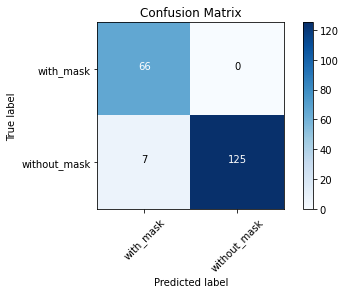

In [6]:
# Predictions.
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
# Confusion Matrix.
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['with_mask', 'without_mask']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')